# Programming 0: First Quantum Computations

**Prof. Dr. Birger Horstmann, Konstantin Lamp**

**solve this exercise in the tutorial on October 22, 2025**

## Prelimenary remarks:

Executing Quantum Algorithms from a high level perspective is very similar to performing classical computations using a low-level programming language. It can be broken down into four steps:

- **Build**: Design of the program, usually the creation of a gate-based quantum circuit
- **Compile (or Transpile)**: Transform the quantum circuit to a list of machine-specific instructions.
- **Run**: Execute the compiled program
- **Analyse**: Analyse, visualize and/or post-process results

Here is a minimal code example with explanations from Qiskit Tutorials:

In [1]:
# Import needed modules
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram


# -------- Building -----------------------------
# Create a Quantum Circuit with 2 qubits and 2 classical bits to store the measurement
circuit = QuantumCircuit(2, 2)

# Add a Hadamard gate on qubit 0, creating a superposition state
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0, 1], [0, 1])


# -------- Transpilation ------------------------
# Use Aer's AerSimulator
simulator = AerSimulator()

# Compile the circuit for the supported instruction set (basis_gates)
# and topology (coupling_map) of the backend
compiled_circuit = transpile(circuit, simulator)


# -------- Execution ----------------------------
# Execute the circuit on the aer simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()


# -------- Analysis -----------------------------
# Returns counts
counts = result.get_counts()
print("\nTotal count for 00 and 11 are:", counts)

# Draw the circuit
circuit.draw()


Total count for 00 and 11 are: {'00': 496, '11': 504}


┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

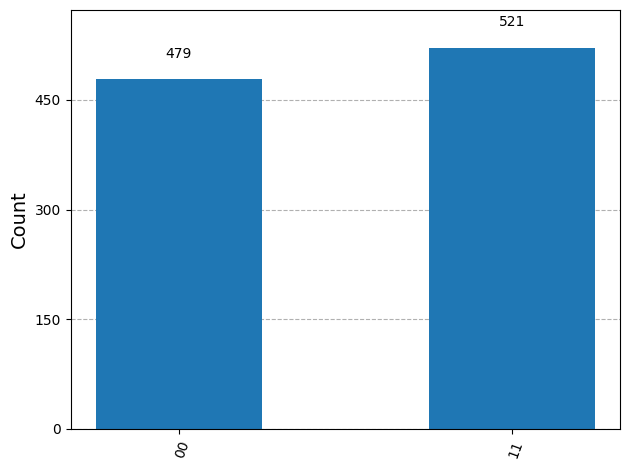

In [2]:
# Plot a histogram
plot_histogram(counts)

As you may recognize, the circuit creates the Bell state:

$$ | \Phi^+ \rangle = \frac{1}{\sqrt 2}\left(|00\rangle + |11\rangle\right) $$

When performing the quantum computation we do measurements in the computational basis, which means we will only get back a single vector $|xy\rangle$ with $x,y \in \{0,1\}$ each time we execute the circuit. A single execution is called *shot*, so the `shots` keyword in the `run()` method specifies the number of executions. The counts dictionary reported from the `result` object contains the information, how many times a given vector 'xy' was measured. From a theoretical viewpoint, we sample from the probabilities 

$$\text{Pr}(xy) = \left | \langle xy | \Psi \rangle \right | ^ 2 \, .$$



<a id='eq1'></a>

The counts devided by the number of shots, therefore converge to the probabilities like:

$\begin{equation} \text{error} = \left|\frac{\text{counts}(\dots)}{\#\text{shots}} - \text{Pr}(\dots)\right| \sim \frac 1 {\sqrt{\#\text{shots}}}\,. \end{equation}$ 

This error due to a finite number of shots is often called **shot noise**.

# Exercise: Superposition state
**a) Build, compile, and execute a superposition state of 4 qubits**

You should prepare $$ | \Psi \rangle = \sum_{ijkl \in \{0,1\}} \frac{1}{\sqrt{16}} |ijkl\rangle $$

In [2]:
# Import needed modules
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram


# create circuit register
circuit = QuantumCircuit(4, 4)

# apply gates and measurements

# Add a Hadamard gate on qubit 0, creating a superposition state
circuit.h(0)


# Add a Hadamard gate on qubit 1, creating a superposition state
circuit.h(1)

# Add a Hadamard gate on qubit 2, creating a superposition state
circuit.h(2)    

# Add a Hadamard gate on qubit 3, creating a superposition state
circuit.h(3)        



# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 2
circuit.cx(0, 2)    

# Add a CX (CNOT) gate on control qubit 0 and target qubit 3
circuit.cx(0, 3)




# Map the quantum measurement to the classical bits
circuit.measure([0, 1, 2, 3], [0, 1, 2, 3])




# compile


#get counts and draw circuit



# -------- Transpilation ------------------------
# Use Aer's AerSimulator
simulator = AerSimulator()

# Compile the circuit for the supported instruction set (basis_gates)
# and topology (coupling_map) of the backend
compiled_circuit = transpile(circuit, simulator)


# -------- Execution ----------------------------
# Execute the circuit on the aer simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()


# -------- Analysis -----------------------------
# Returns counts
counts = result.get_counts()
print("\nTotal count  are:", counts)

# Draw the circuit
circuit.draw()




Total count  are: {'0111': 76, '0000': 56, '0101': 56, '0110': 57, '1001': 71, '0100': 66, '1100': 70, '1110': 69, '1000': 57, '1011': 53, '1111': 65, '1101': 58, '0010': 56, '1010': 56, '0001': 55, '0011': 79}


┌───┐                     ┌─┐   
q_0: ┤ H ├──■────■───────■─────┤M├───
     ├───┤┌─┴─┐  │  ┌─┐  │     └╥┘   
q_1: ┤ H ├┤ X ├──┼──┤M├──┼──────╫────
     ├───┤└───┘┌─┴─┐└╥┘  │  ┌─┐ ║    
q_2: ┤ H ├─────┤ X ├─╫───┼──┤M├─╫────
     ├───┤     └───┘ ║ ┌─┴─┐└╥┘ ║ ┌─┐
q_3: ┤ H ├───────────╫─┤ X ├─╫──╫─┤M├
     └───┘           ║ └───┘ ║  ║ └╥┘
c: 4/════════════════╩═══════╩══╩══╩═
                     1       2  0  3

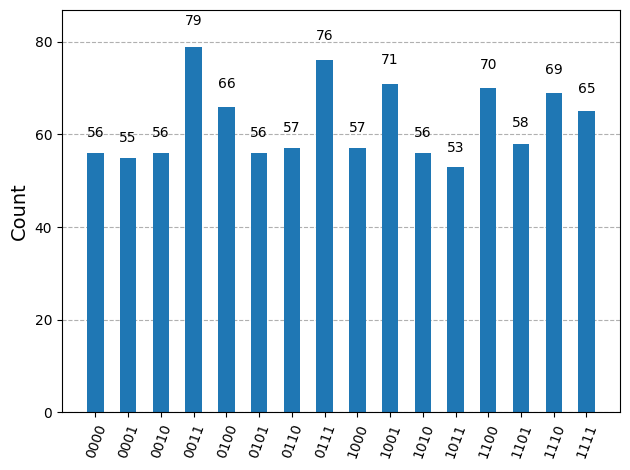

In [3]:
# plot counts
plot_histogram(counts)

**b) Verify the statement in [equation (1)](#eq1) for the superposition state by creating a log-log plot**

In [4]:
# you might want to use:
from matplotlib import pyplot as plt
import numpy as np

In [21]:
# create a list of exponentially increasing values
l = [2**i for i in range(1, 10)]
l_i = [i for i in range(1,10)]

In [22]:
# save counts for the superposition state using more and more shots
# Execute the circuit on the aer simulator
counts_i = [0]*len(l_i)
for i in l_i:
    simulator = AerSimulator()

    # Compile the circuit for the supported instruction set (basis_gates)
    # and topology (coupling_map) of the backend
    compiled_circuit = transpile(circuit, simulator)
    job = simulator.run(compiled_circuit, shots=l[i-1])

    # Grab results from the job
    results_temp = job.result()
    counts_i[i-1] = results_temp.get_counts()
    # print("\nTotal count are for i=",i,":", counts_i[i-1])




In [ ]:
# calculate average error

error_i = 1/np.sqrt(l)

# Calculate the error for all possible 4-qubit states (16 total)
states = [format(i, '04b') for i in range(16)]
error_correct = [
    sum(
        np.abs(counts.get(state, 0) / shots - 1/16)
        for state in states
    )
    for counts, shots in zip(counts_i, l)
]

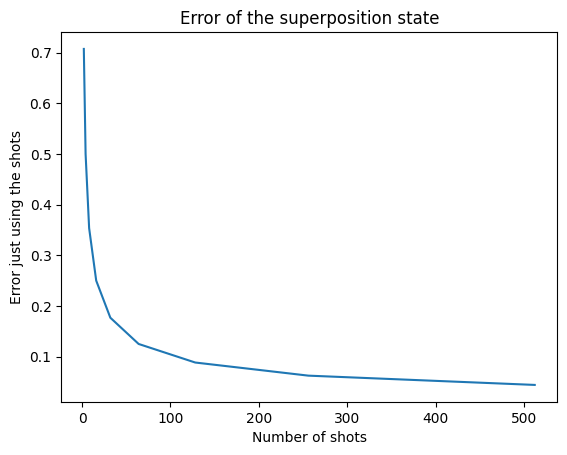

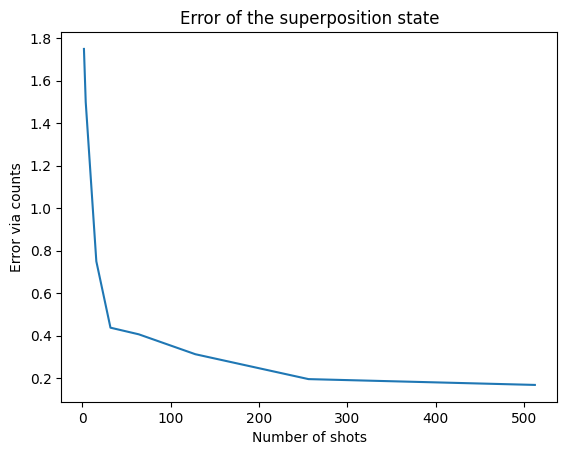

In [ ]:
# plot error results
import matplotlib.pyplot as plt


plt.plot(l,error_i)
plt.xlabel('Number of shots')
plt.ylabel('Error just using the shots')
plt.title('Error of the superposition state')
plt.show()

plt.plot(l,error_correct)
plt.xlabel('Number of shots')
plt.ylabel('Error via counts')
plt.title('Error of the superposition state')
plt.show()

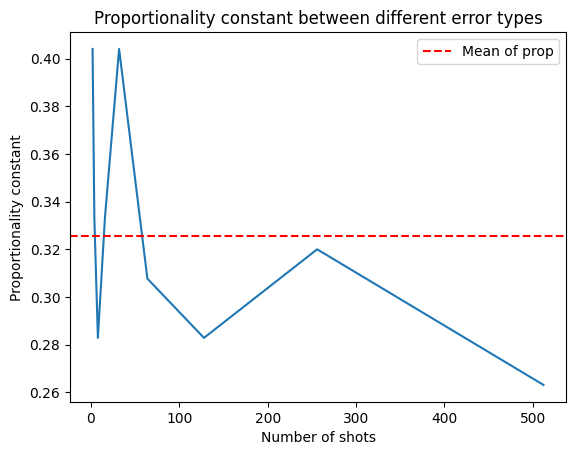

In [34]:
# Proportionality constant between different error types

prop = error_i/error_correct
np.mean(prop)
plt.plot(l,prop)
plt.axhline(np.mean(prop), color='r', linestyle='--', label='Mean of prop')
plt.xlabel('Number of shots')
plt.ylabel('Proportionality constant')
plt.title('Proportionality constant between different error types')
plt.legend()
plt.show()